## TENSORFLOW LINEAR REGRESSION 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

%matplotlib inline 

## Taking some 2 Million data points  

In [26]:
x_data = np.linspace(0,10,2000000)  




#### Keep the value of 2nd argument small ,infact the diff between start and end in the linspace should be other wise , the plot will be nearly linear 

In [27]:
noise = np.random.randn(len(x_data))

### y = mx + b + noise 

In [28]:
b = 5 

m = 0.67 


y = m*x_data + b + noise  

In [29]:
data = pd.concat([pd.DataFrame(data = x_data ,columns = ['X']) ,  pd.DataFrame(data = y , columns =['Y'] )] , axis=1)

In [30]:
data.head()

,X,Y
0,0.000000,6.430447
1,0.000005,5.720013
2,0.000010,4.098786
3,0.000015,6.116441
4,0.000020,3.706799


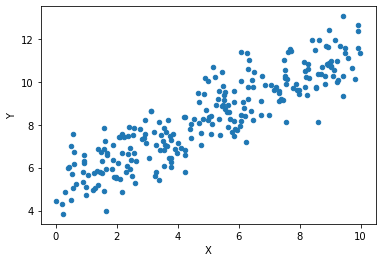

In [32]:
data.sample(250).plot(kind = 'scatter' ,x= 'X',y = 'Y')

## TENSORFLOW PART STARTS  !!!! 

### BATCH SIZE

In [51]:
batch_size = 8 

#### Variable

In [52]:
m = tf.Variable(6.0)    
b = tf.Variable(9.0) 

#### PlaceHolder

In [53]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

#### GRAPH

In [54]:
y_model = m*xph + b

#### LOSS FUNCTION

In [55]:
error = tf.reduce_sum(tf.square(yph-y_model))

#### OPTIMIZER

In [57]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### RUNNING SESSION

In [42]:
init = tf.global_variables_initializer()

In [44]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [45]:
model_b

5.035518

In [58]:
model_m

0.6411621

### RESULT

In [47]:
y_hat = x_data * model_m + model_b

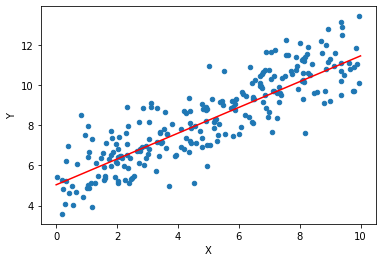

In [50]:
data.sample(n=250).plot(kind='scatter',x='X',y='Y')
plt.plot(x_data,y_hat,'r')